![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from nltk.stem.snowball import SnowballStemmer


In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

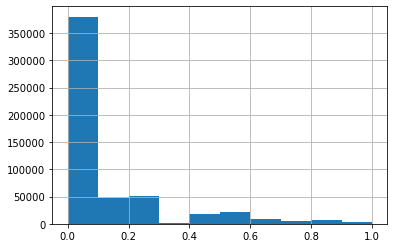

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

 Decidimos reducir el tamaño de la muestra a 50.000 registros debido al tiempo de procesamiento computacional del modelo 

In [5]:
df= df.sample(n=50000, random_state=42)

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    50000.000000
mean         0.102826
std          0.195921
min          0.000000
25%          0.000000
50%          0.000000
75%          0.166667
max          1.000000
Name: target, dtype: float64

In [7]:
y.head()

356574    0.0
471747    0.0
118328    0.0
142944    0.0
496670    0.0
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train.head()

164676    Correct, the police under no obligation to pro...
268128    Annie, public relief offered by states to the ...
287733             Clark has never kept promises. Times up.
406335    I've always loved sticks because of the contro...
64071     Kindergarten Christians deny Noah did, but cur...
Name: comment_text, dtype: object

In [11]:
X_train.shape

(33500,)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
features=5000

In [13]:
# Celda 1
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error

features=50
# preprocesamiento de datos
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# creación y entrenamiento del modelo
model_countv = RandomForestRegressor(n_jobs=-1,n_estimators =50,max_features = features)
model_countv.fit(X_train_vectorized, y_train)

# evaluación del modelo
y_pred = model_countv.predict(X_test_vectorized)
mse_countv = mean_squared_error(y_test, y_pred)
print("MSE:", mse_countv)

# Cálculo del MAE
mae_countv = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae_countv)

# Cálculo del MAPE
mape_countv = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape_countv)

# Cálculo del RMSE
rmse_countv = np.sqrt(mse_countv)
print("RMSE:", rmse_countv)

MSE: 0.027589679659017374
MAE: 0.11602553826909891
MAPE: inf
RMSE: 0.1661014137779007


Luego de utilizar el CountVectorizer para preprocesar la información obtenida a partir de comentarios tóxicos a través de un RandomForest el cuál predice la probabilidad de que un comnetario sea tóxico y tuneando el modelo identificamos los mejores parámetros como max_features de 50.000 y n_estimators de 50. Con esto un obtiene un MSE de 0.0271, un MAE de 0.115 y un RMSE de 0.164 lo cuál consideramos que no es un buen indicador de desempeño del modelo ya que, para estimar una predicción puede tener un error en la probabilidad de mas o menos 0.11.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 2
# preprocesamiento de datos
vectorizer = CountVectorizer(ngram_range=(1,3))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# creación y entrenamiento del modelo
model_countvTr = RandomForestRegressor(n_jobs=-1,n_estimators = 50,max_features = features)
model_countvTr.fit(X_train_vectorized, y_train)

# evaluación del modelo
y_pred = model_countvTr.predict(X_test_vectorized)
mse_trig = mean_squared_error(y_test, y_pred)
print("MSE:", mse_trig)
# Cálculo del MAE
mae_trig = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae_trig)

# Cálculo del MAPE
mape_trig = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape_trig)

# Cálculo del RMSE
rmse_trig = np.sqrt(mse_trig)
print("RMSE:", rmse_trig)

MSE: 0.034753430551000115
MAE: 0.1179935646808112
MAPE: inf
RMSE: 0.18642272005042765


Luego de utilizar el CountVectorizer con trigramas para preprocesar la información obtenida a partir de comentarios tóxicos a través del RandomForest  y los parámetros de max_features de 50.000 y n_estimators de 50 obtenemos un MSE de 0.0345, un MAE de 0.118 y un RMSE de 0.186 lo cuál en comparaación con el metodo anterior no tiene una variación significativa o incluso peor desempeño ya que, para estimar una predicción puede tener un error en la probabilidad de mas o menos 0.118.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

TfidfVectorizer es una función de preprocesamiento de texto utilizadas para convertir textos en vectores numéricos que pueden ser procesados por algoritmos de Machine learning, creando un vocabulario a partir de los textos de entrada y transforman cada documento en un vector que representa la frecuencia de las palabras en el vocabulario.

La principal diferencia que cuenta con CountVectorizer es que asigna un peso a cada palabra en el documento, cuenta el número de veces que aparece una palabra en el documento. La inversa de la frecuencia de documento (IDF) mide la rareza de la palabra en el conjunto de documentos de entrenamiento. Las palabras que aparecen con frecuencia en todos los documentos tendrán un IDF bajo y, por lo tanto, tendrán un peso bajo en el vector del documento. Por otro lado, las palabras que aparecen en pocos documentos tendrán un IDF alto y, por lo tanto, tendrán un peso alto en el vector del documento. Esto significa que las palabras que son informativas para la tarea de clasificación tendrán un peso más alto, mientras que las palabras comunes tendrán un peso más bajo. Mientras que CountVectorizer simplemente cuenta el número de ocurrencias de cada palabra en el documento, lo que significa que las palabras más frecuentes tendrán valores más altos.

##### Ventajas:

* TfidfVectorizer considera la importancia de las palabras, asignando un puntaje más alto a las palabras que son más relevantes para un documento en particular. Esto ayuda a destacar las palabras más importantes para el análisis.

* TfidfVectorizer da más importancia a las palabras menos comunes que aparecen en un corpus, resaltando los términos raros que pueden ser importantes para la interpretación del texto.

* TfidfVectorizer reduce el peso de las palabras comunes que aparecen en muchos documentos, evitando que estas dominen los resultados y destacando las palabras más distintivas en el análisis.

##### Desventajas:

* TfidfVectorizer requiere más tiempo de procesamiento que CountVectorizer debido al cálculo de los puntajes Tfidf, lo que puede hacer que sea más lento en el procesamiento de grandes cantidades de datos.

* TfidfVectorizer se centra en la importancia relativa de las palabras en un documento y no tiene en cuenta la frecuencia absoluta de las palabras, lo que puede ser un problema en algunos casos donde la frecuencia de la palabra es importante para el análisis.

* TfidfVectorizer puede no ser siempre mejor que CountVectorizer, ya que el enfoque más adecuado dependerá del problema específico y los datos disponibles para el análisis.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 4
# preprocesamiento de datos
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# creación y entrenamiento del modelo
model = RandomForestRegressor(n_jobs=-1,n_estimators = 50,max_features = features)
model.fit(X_train_vectorized, y_train)

# evaluación del modelo
y_pred = model.predict(X_test_vectorized)
mse_tfid = mean_squared_error(y_test, y_pred)
print("MSE:", mse_tfid)
# Cálculo del MAE
mae_tfid = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae_tfid)

# Cálculo del MAPE
mape_tfid = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape_tfid)

# Cálculo del RMSE
rmse_tfid = np.sqrt(mse_tfid)
print("RMSE:", rmse_tfid)

MSE: 0.028621989701318348
MAE: 0.11715015509291034
MAPE: inf
RMSE: 0.16918034667572457


Luego de utilizar el TfidfVectorizer  para preprocesar la información obtenida asignando un puntaje más alto a las palabras que tienen mayor relevancia a partir de comentarios tóxicos, se evidencia que al aplicar en RandomForest y los parámetros de max_features de 50.000 y n_estimators de 50 obtenemos un MSE de 0.028, un MAE de 0.116 y un RMSE de 0.168 lo cuál en comparaación con los métodos anteriores no presenta una variación significativa o incluso peor desempeño que al aplicar el método de CountVectorizer ya que, para estimar una predicción puede tener un error en la probabilidad de mas o menos 0.116.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

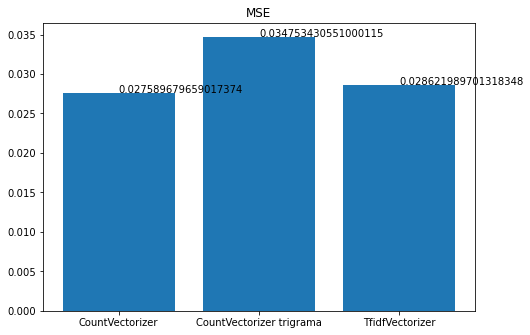

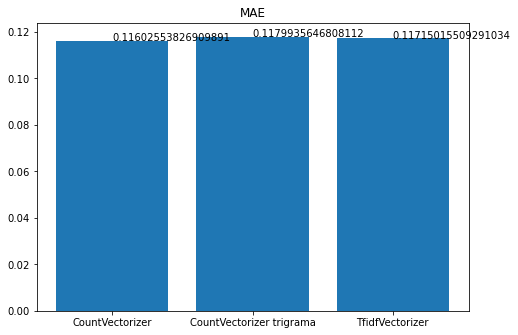

In [16]:
# Celda 5
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE")
ejeX = ['CountVectorizer', 'CountVectorizer trigrama','TfidfVectorizer']
ejeY = [mse_countv,mse_trig,mse_tfid]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("MAE")
ejeX = ['CountVectorizer', 'CountVectorizer trigrama','TfidfVectorizer']
ejeY = [mae_countv,mae_trig,mae_tfid]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Al realizar la comparación entre los tres métodos CountVectorizer, CountVectorizer con trigrama y TfidfVectorizer aplicamos las métricas del MSE y el MAE encontrando que se obtiene un mejor desempeño con el CountVectorizer ya que encontramos un MSE y un MAE menores para este método debido a que tiene un procesamiento más sencillo para las palabras encontradas en los comentarios mientras que el método de CountVectorizer con Trigramas genera más features para el modelo, por último el método TfidfVectorizer aunque asigna un peso mayor a las palabras menos comunes en este caso debido a la naturaleza del problema para identificar comentarios tóxicos la frencuencia de repetición de las palabras es más relevante que la aparicicón de palabaras no comunes.